Importing all necessary modules

In [65]:
try:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt   
    print("all modules imported succesfully")
except Exception as e:
    print(e)
    exit()

all modules imported succesfully


In [14]:
data = pd.read_csv('Datasets/DS/insurance.csv',na_filter=False)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [16]:
data.shape

(1338, 7)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [18]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [20]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [21]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [23]:
data['sex']=data['sex'].map({'female':0,'male':1})

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [26]:
data['smoker']=data['smoker'].map({'yes':0,'no':1})

In [27]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,southwest,16884.92400
1,18,1,33.770,1,1,southeast,1725.55230
2,28,1,33.000,3,1,southeast,4449.46200
3,33,1,22.705,0,1,northwest,21984.47061
4,32,1,28.880,0,1,northwest,3866.85520


In [28]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [37]:
# data['region']=data['region'].map({'yes':0,'no':1})
data['region']=data['region'].map({data['region'].unique()[i]:i+1 for i in range(len(data['region'].unique()))})

In [38]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,0,1,16884.92400
1,18,1,33.770,1,1,2,1725.55230
2,28,1,33.000,3,1,2,4449.46200
3,33,1,22.705,0,1,3,21984.47061
4,32,1,28.880,0,1,3,3866.85520


In [41]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [42]:
X = data.drop(['charges'],axis=1)

In [43]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,0,1
1,18,1,33.770,1,1,2
2,28,1,33.000,3,1,2
3,33,1,22.705,0,1,3
4,32,1,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,1,3
1334,18,0,31.920,0,1,4
1335,18,0,36.850,0,1,2
1336,21,0,25.800,0,1,1


In [44]:
y = data['charges']

In [45]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

In [61]:
lr = LinearRegression()
svm = SVR()
rf = RandomForestRegressor()
gr = GradientBoostingRegressor()

lr.fit(X_train,y_train)
svm.fit(X_train,y_train)
rf.fit(X_train,y_train)
gr.fit(X_train,y_train)

GradientBoostingRegressor()

In [62]:
y_pred1 = lr.predict(X_test)
y_pred2 = svm.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = gr.predict(X_test)

In [63]:
df1 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gr':y_pred4})

In [64]:
df1

,Actual,Lr,svm,rf,gr
764,9095.06825,8924.407244,9548.095432,10950.527429,11001.128629
887,5272.17580,7116.295018,9492.005195,5255.937703,5840.174656
890,29330.98315,36909.013521,9649.076063,28498.870585,28001.980112
1293,9301.89355,9507.874691,9554.920417,10331.350379,9745.291602
259,33750.29180,27013.350008,9419.697424,34588.514220,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9649.235457,46911.066915,45431.423211
575,12222.89830,11814.555568,9625.696314,12134.065980,12465.025294
535,6067.12675,7638.107736,9503.727718,6399.275649,6974.336525
543,63770.42801,40959.081722,9605.106753,46700.297592,47862.047791


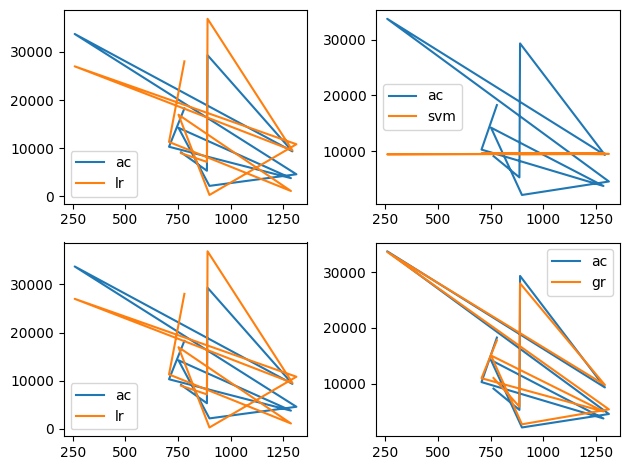

In [81]:
# try:
#     plt.plot(df1['Actual'].iloc[0:11],label="ac")
# except Exception as e:
#     print(e)
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label="ac")
plt.plot(df1['Lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['svm'].iloc[0:11],label='svm')
plt.legend()


plt.subplot(223)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['Lr'].iloc[0:11],label='lr')
plt.legend()


plt.subplot(224)
plt.plot(df1['Actual'].iloc[0:11],label='ac')
plt.plot(df1['gr'].iloc[0:11],label='gr')
plt.legend()


plt.tight_layout()
plt.legend()